In [1]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import  matplotlib.pyplot as plt  

In [2]:
os.chdir(r"C:\Users\ACER\Downloads\PYTHAN\Datasets-main\Datasets-main")

In [3]:
df=pd.read_csv("auto-mpg.csv")
# data=df.copy()

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.drop("car name",axis=1,inplace=True)

In [6]:
df.dropna(axis=1,how='all',inplace=True)

In [7]:
df['horsepower']=df['horsepower'].replace('?',150)

In [8]:
df['horsepower']=pd.to_numeric(df['horsepower'])
df['horsepower'].astype(str).astype(float)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.0 KB


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [11]:
df["cylinders"].value_counts()/len(df)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

In [12]:
df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

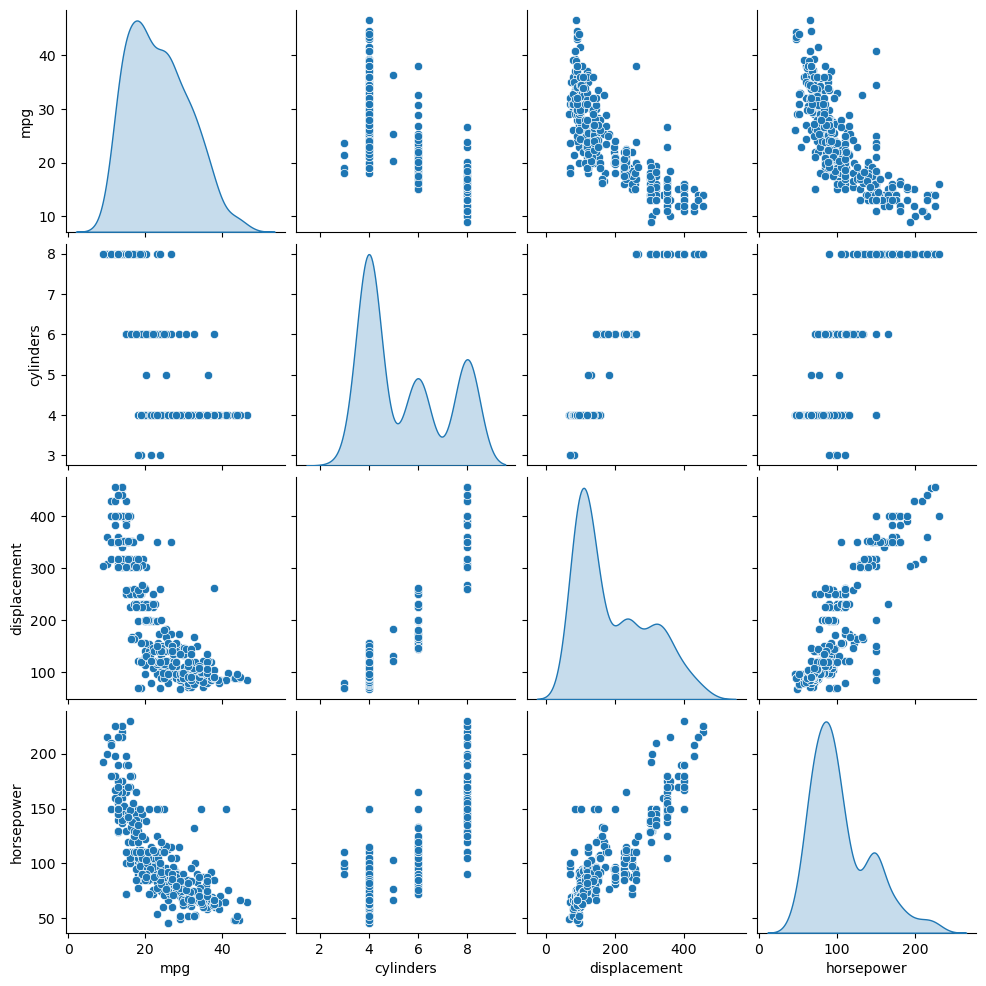

In [13]:
sns.pairplot(df[["mpg",'cylinders','displacement','horsepower']],diag_kind="kde")

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df["cylinders"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [15]:
df=strat_train_set.drop('mpg',axis=1)
df_labels=strat_train_set['mpg']

In [16]:
strat_train_set['cylinders'].value_counts()/len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: cylinders, dtype: float64

In [17]:
strat_test_set['cylinders'].value_counts()/len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: cylinders, dtype: float64

In [18]:
strat_train_set['origin']=strat_train_set['origin'].replace({1:'india', 2:'USA', 3:'Germany'})
# train_set.drop("car name",axis=1,inplace=True)
strat_train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,32.0,4,83.0,61,2003,19.0,74,Germany
151,31.0,4,79.0,67,2000,16.0,74,USA
388,26.0,4,156.0,92,2585,14.5,82,india
48,18.0,6,250.0,88,3139,14.5,71,india
114,26.0,4,98.0,90,2265,15.5,73,USA


In [19]:
strat_test_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
128,15.0,6,250.0,100,3336,17.0,74,1
100,18.0,6,250.0,88,3021,16.5,73,1
330,40.9,4,85.0,150,1835,17.3,80,2
57,24.0,4,113.0,95,2278,15.5,72,3
160,17.0,6,231.0,110,3907,21.0,75,1


In [20]:
strat_train_set=pd.get_dummies(strat_train_set , prefix='' , prefix_sep='')
strat_train_set.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Germany,USA,india
198,33.0,4,91.0,53,1795,17.4,76,1,0,0
360,30.7,6,145.0,76,3160,19.6,81,0,1,0
297,25.4,5,183.0,77,3530,20.1,79,0,1,0
235,26.0,4,97.0,75,2265,18.2,77,1,0,0
156,16.0,8,400.0,170,4668,11.5,75,0,0,1
31,25.0,4,113.0,95,2228,14.0,71,1,0,0
82,23.0,4,120.0,97,2506,14.5,72,1,0,0
365,20.2,6,200.0,88,3060,17.1,81,0,0,1
258,20.6,6,231.0,105,3380,15.8,78,0,0,1
301,34.2,4,105.0,70,2200,13.2,79,0,0,1


In [21]:
# train_set.info()

In [22]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()

data_cat_1hot=cat_encoder.fit_transform(df)

data_cat_1hot.toarray()[:5]

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([4.000e+00, 1.460e+02, 9.500e+01, 2.844e+03, 1.550e+01, 7.600e+01,
       1.000e+00])

In [25]:
df.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [26]:
# from sklearn.base import BaseEstimator , TransformerMixin
# acc_ix ,hpower_ix , cyl_ix =4,2,0

# class CustomAttrAdder(BaseEstimator,TransformerMixin):
#     def __init__(self,acc_on_power=True):
#         self.acc_on_power=acc_on_power
#     def fit (self,x,y=None):
#         return self
#     def transform(self,x):
#         acc_on_cyl=x[:acc_ix] / x[:cyl_ix]
#         if self.acc_on_power:
#             acc_on_power=x[:,acc_ix] / x[:hpower_ix]
#             returnnp.c_[x,acc_on_power,acc_on_cyl]
            
#         return np.c_[x,acc_on_cyl]
# attr_adder = CustomAttrAdder(acc_on_power=True)     
# data_tr_extra_attrs=attr_adder.transform(df.values)
# data_tr_extra_attrs[0]

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def num_pipeline_transformer(df):
    
    numerics=['float64','int64']
    num_attrs=df.select_dtypes(include=numerics)
    num_pipeline= Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler',StandardScaler()),
    ])
    return num_attrs ,num_pipeline


In [28]:
from sklearn.compose import ColumnTransformer

def pipeline_transformer(df):
    
    cat_attrs=['origin']
    num_attrs,num_pipeline=num_pipeline_transformer(df)
    full_pipeline=ColumnTransformer([
        ('num',num_pipeline,list(num_attrs)),
        ('cat',OneHotEncoder(),cat_attrs),
        ])
    prepared_data=full_pipeline.fit_transform(df)
    return prepared_data

In [29]:
def preprocess_origin_cols(df):
    df['origin']=df['origin'].map({1:'india',2:'usa',3:'germany'})
    return df

In [30]:
preprocessed_df=preprocess_origin_cols(df)
prepared_data=pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.16121123, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -1.00075417, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.33218311, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.54612585, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.25195458, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.41661649, ...,  1.        ,
         0.        ,  0.        ]])

In [31]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.16121123, -1.17220298,  1.21586943,
       -0.54436373,  1.        ,  0.        ,  0.        ])

In [32]:
prepared_data.shape

(318, 9)

In [33]:
df_labels.shape

(318,)

In [34]:
df_labels[0]

18.0

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(prepared_data,df_labels)

RandomForestRegressor()

In [36]:
sample_data=df.iloc[:5]
sample_labels=df_labels.iloc[:5]
sample_data_prepared=pipeline_transformer(sample_data)

In [37]:
model.predict(sample_data_prepared)

array([26.103, 26.937, 23.992, 14.01 , 23.125])

In [38]:
list(sample_labels)

[32.0, 31.0, 26.0, 18.0, 26.0]

In [39]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(prepared_data)
lin_mse=mean_squared_error(df_labels,df_predictions)
lin_rmse=np.sqrt(lin_mse)

In [40]:
lin_rmse

1.0069218802647868

In [41]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,prepared_data,df_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [42]:
rmse_scores

array([2.09987518, 2.4948758 , 2.81707166, 2.36611226, 2.14263626,
       2.50228374, 2.71412524, 2.65984226, 4.25458272, 2.0030294 ])

In [43]:
def print_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('Standard daviation:',scores.std())

In [44]:
print_scores(rmse_scores)

scores: [2.09987518 2.4948758  2.81707166 2.36611226 2.14263626 2.50228374
 2.71412524 2.65984226 4.25458272 2.0030294 ]
mean: 2.605443452003855
Standard daviation: 0.6076229757076465


### decision tree :
                              mean: 3.1902948954590675
                             Standard daviation: 0.5028079743202888
### linear regression     
               mean: 3.3338772332113735
               Standard daviation: 0.4428840606087046 
### random forest :
             mean: 2.6256466260894102
             Standard daviation: 0.5949101690337901

In [45]:
# from sklearn.model_selection import GridSearchCV

# param_grid=[
#     {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
#     {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
# ]
# forest_reg=RandomForestRegressor()

# grid_search=GridSearchCV(forest_reg,param_grid,
#                         scoring='neg_mean_squared_error',
#                         return_train_score=True,
#                         cv=10
#                         )
# grid_search.fit(prepared_data,df_labels)

In [46]:
# feature_importances=grid_search.best_estimator_.feature_importances_

# numerics=['float64','int64']
# num_attrs=list(df.select_dtypes(include=numerics))

# attrs=num_attrs
# sorted(zip(attrs,feature_importances),reverse=True)

In [47]:
# final_model=grid_search.best_estimator_

# x_test=strat_test_set.drop('mpg',axis=1)
# y_test=strat_test_set['mpg'].copy()
# x_test_preprocessed=preprocess_origin_cols(x_test)
# x_test_prepared=pipeline_transformer(x_test_preprocessed)

In [48]:
# final_predictions=final_model.predict(x_test_prepared)
# final_mse=mean_squared_error(y_test,final_predictions)
# final_rmse=np.sqrt(final_mse)

In [49]:
# final_rmse

In [50]:
x_test=strat_test_set.drop('mpg',axis=1)
y_test=strat_test_set['mpg'].copy()
x_test_preprocessed=preprocess_origin_cols(x_test)
x_test_prepared=pipeline_transformer(x_test_preprocessed)

In [51]:
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,   list(y_test))

[18.661 18.996 33.664 23.281 17.126 20.155 18.584 14.225 23.875 15.675
 23.37  35.808 29.69  23.54  29.635 21.049 14.235 28.196 13.32  35.613
 21.01  15.447 18.172 13.905 16.861 33.461 24.121 19.919 27.135 12.6
 20.515 33.808 16.278 18.29  30.096 14.5   24.554 14.63  33.491 33.796
 32.071 31.255 39.286 33.875 20.16  24.147 29.973 25.243 15.556 20.689
 24.377 26.075 14.156 24.08  24.81  23.674 25.65  13.55  13.305 33.131
 27.291 20.238 30.575 33.455 24.533 27.356 25.843 35.751 23.286 13.48
 11.79  25.101 20.809 12.855 26.858 30.53  27.509 26.526 14.754 26.971] [15.0, 18.0, 40.9, 24.0, 17.0, 20.2, 19.2, 14.0, 25.0, 16.0, 22.0, 44.0, 33.0, 24.0, 31.5, 21.0, 14.0, 32.9, 14.0, 38.1, 18.0, 14.0, 18.5, 14.0, 15.5, 33.0, 26.0, 20.5, 25.8, 11.0, 20.0, 41.5, 14.0, 19.0, 26.0, 14.0, 25.1, 14.0, 34.0, 29.8, 31.0, 31.5, 32.8, 36.0, 26.6, 28.0, 31.6, 32.7, 13.0, 19.4, 24.0, 30.0, 16.0, 25.0, 25.0, 19.8, 28.0, 14.0, 12.0, 35.7, 33.5, 23.0, 35.0, 36.1, 23.0, 28.0, 23.5, 39.0, 21.5, 12.0, 13.0, 27.0, 2

In [52]:
final_rmse

2.9869313873103938

In [53]:
 from joblib import dump,load
dump(model,'Auto_mpg.joblib')

['Auto_mpg.joblib']

In [54]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.16121123, -1.17220298,  1.21586943,
       -0.54436373,  1.        ,  0.        ,  0.        ])